#Visualization Using Kaggle's dataset (Us police Shootings)


In [ ]:
# importing the libraries that will allow us to work with Pandas DataFrames
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [ ]:
#will mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
 import os

In [ ]:
#using API token from Kaggle
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Kaggle'

In [ ]:
#Downloading Dataset with the help of json file stored in drive
!kaggle datasets download -d ahsen1330/us-police-shootings

us-police-shootings.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#read data set
shoot=pd.read_csv("us-police-shootings.zip")

In [ ]:
shoot.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [ ]:
#making a copy of dataset for manupulation

shoot_copy=shoot

In [ ]:
shoot_copy.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


#Data cleaning



In [ ]:
#changing data type of date column
shoot_copy['date'] = shoot_copy['date'].astype('datetime64[ns]')
shoot_copy.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
arms_category                      object
dtype: object

In [ ]:
#extract month and year from date column
shoot_copy['month'] = pd.DatetimeIndex(shoot_copy['date']).month
shoot_copy['year']=pd.DatetimeIndex(shoot_copy['date']).year

shoot_copy.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,month,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,1,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,1,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,1,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,1,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,1,2015


In [ ]:
# converting month numbers into month names using lambda function
import calendar

shoot_copy['Month_Name'] = shoot_copy['month'].apply(lambda x: calendar.month_abbr[x])
shoot_copy.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,month,year,Month_Name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,1,2015,Jan
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,1,2015,Jan
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,1,2015,Jan
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,1,2015,Jan
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,1,2015,Jan


# Bar chart


Ques: Create a bar chart  for people shot from 2015 to 2020

# Filtering Data for the Bar Chart

In [ ]:
# filter the df just for the information about shot 

df_shoot = shoot_copy[shoot_copy['manner_of_death']=='shot']

#to check the shape of the dataframes
print(shoot_copy.shape[0])
print(df_shoot.shape[0])
df_shoot.head(2)

4895
4647


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,month,year,Month_Name
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,1,2015,Jan
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,1,2015,Jan


In [ ]:
#grouping the data by year and manner of death by using count aggregrate function
df_shoot_bar=df_shoot.groupby('year')['manner_of_death'].agg(shots='count')

In [ ]:
df_shoot_bar.head()

,shots
year,
2015,898
2016,849
2017,857
2018,859
2019,827


#Creating bar chart


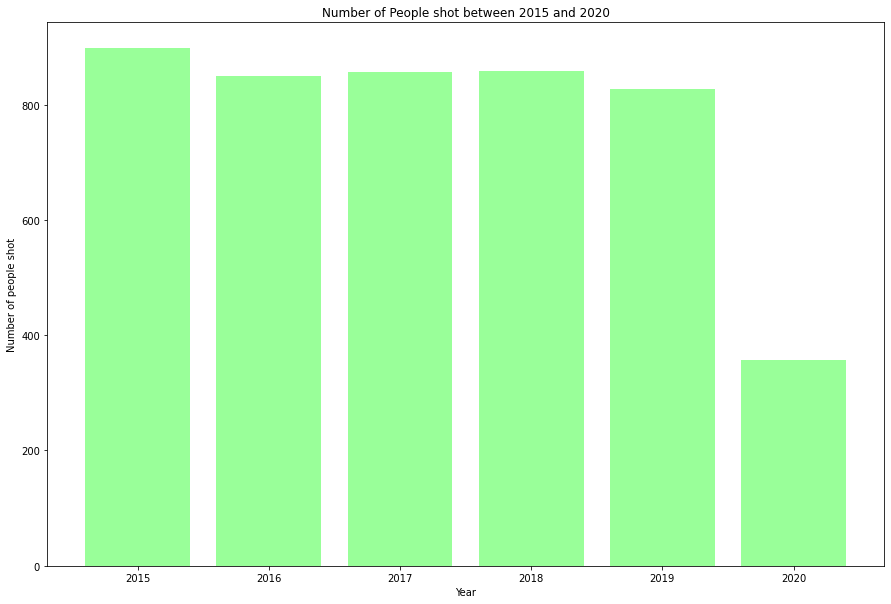

In [ ]:
#creating canvas
fig,ax = plt.subplots(figsize =(15,10))
#adding data
ax.bar(df_shoot_bar.index, df_shoot_bar.shots, color = '#99ff99')

#setting labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of people shot')

#adding title
plt.title('Number of People shot between 2015 and 2020')

#Display the plot
plt.show()

#Pie-Chart


**Ques1:** *Create a pie chart to display percentage of male and female shot between 2015 and 2020*

**Filtering data for pie chart**

In [ ]:
#grouping data by gender and aggregating with number of count to know male and female shot
df_shoot_pie=df_shoot.groupby('gender')['manner_of_death'].agg(shots='count')
df_shoot_pie.head()

,shots
gender,
F,216
M,4431


#Displaying Pie-Chart


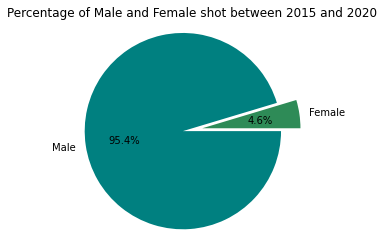

In [ ]:
#created the list for colors and labels
pie_labels = 'Female','Male'
pie_colors = ['seagreen','teal']

#we want to explode female out of the pie-chart
pie_explode = (0.2, 0)

#adding data to the plot 
#Note: ravel() function returns the flattened underlying data as an ndarray
plt.pie(np.array(df_shoot_pie).ravel(),labels=pie_labels,autopct='%1.1f%%',explode=pie_explode,colors=pie_colors)

#sets title for the plot
plt.title('Percentage of Male and Female shot between 2015 and 2020')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.show()

**Ques2:** Create a pie chart to display percentage of people showing signs of mental illness




**Filtering Data for pie chart**

In [ ]:
#grouping data by signs of mental illness and aggregating with count function
df_shoot_pie2=df_shoot.groupby('signs_of_mental_illness')['manner_of_death'].agg(people='count')
df_shoot_pie2.head()

,people
signs_of_mental_illness,
False,3624
True,1023


#Displaying Donut Pie-Chart

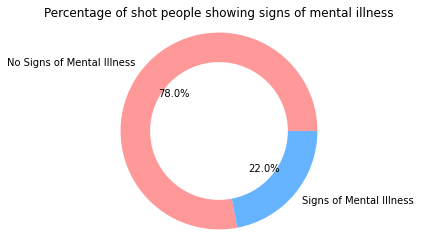

In [ ]:
#list of labels and colors
pie_labels = ['No Signs of Mental Illness','Signs of Mental Illness']
pie_colors = ['#ff9999','#66b3ff']

#creating a canvas
fig1, ax1 = plt.subplots()

#adding data
ax1.pie(np.array(df_shoot_pie2).ravel(),labels=pie_labels,autopct='%1.1f%%',colors=pie_colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Setting the title for donut pie chart
plt.title('Percentage of shot people showing signs of mental illness')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

#display pie chart
plt.show()

#Stacked Bar Chart


#Armed Vs Unarmed


We have to make a list for unarmed weapons to segregate from armed and make a separate column of [is_armed] in the dataset.

In [ ]:
#list for unarmed weapons
unarmed_weapons=['unarmed','toy weapon','flashlight','unknown']

#creating new column for armed or unarmed using lambda function
df_shoot['is_armed'] = df_shoot['armed'].apply(lambda x: 'Armed' if x not in unarmed_weapons else 'Unarmed')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_shoot.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,month,year,Month_Name,is_armed
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,1,2015,Jan,Armed
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,1,2015,Jan,Armed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,1,2015,Jan,Unarmed
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,1,2015,Jan,Armed
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns,1,2015,Jan,Armed


In [ ]:
 #two dataset filtered for armed and unarmed dataset
 unarmed_data = df_shoot[df_shoot['is_armed'] == 'Unarmed']
 armed_data = df_shoot[df_shoot['is_armed'] == 'Armed']

In [ ]:
#grouping data to generate count of unarmed people
df_unarmed_stack=unarmed_data.groupby('year')['is_armed'].agg(unarmed='count')
df_unarmed_stack

,unarmed
year,
2015,200
2016,202
2017,193
2018,140
2019,103
2020,46


In [ ]:
#grouping data to generate count of armed people
df_armed_stack=armed_data.groupby('year')['is_armed'].agg(armed='count')
df_armed_stack

,armed
year,
2015,698
2016,647
2017,664
2018,719
2019,724
2020,311


#Displaying Stacked Bar Chart


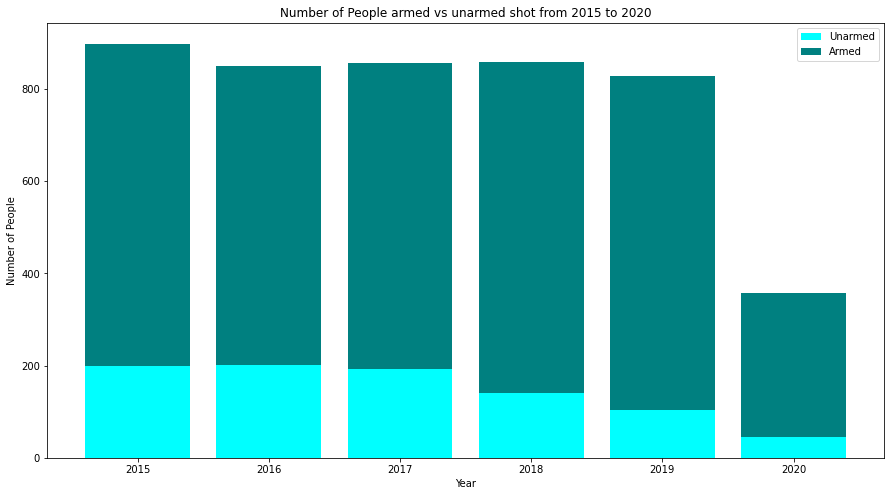

In [ ]:
#creating a canvas
fig,ax = plt.subplots(figsize = (15,8))

#adding data
ax.bar(df_unarmed_stack.index, df_unarmed_stack.unarmed, color = 'cyan', label = 'Unarmed')
ax.bar(df_armed_stack.index, df_armed_stack.armed, bottom = df_unarmed_stack.unarmed, label = 'Armed',color='teal')

#displays legend
ax.legend()

#set x and y labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of People')

#set the title for the chart
plt.title('Number of People armed vs unarmed shot from 2015 to 2020')

#Display the chart
plt.show()